# Title!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('aux-files/custom_style_light.mplstyle')

In [2]:
# grab data
data = pd.read_csv('aux-files/online_retail_pre.csv')
data = data[data['Country'] == 'United Kingdom']['Quantity'].reset_index(drop=True)

# filter for outliers
iqr = 9
upper_outlier_threshold = 10 + 1.5 * iqr
lower_outlier_threshold = 1 - 1.5 * iqr

outlier_filter = (data <= upper_outlier_threshold) & (data  >= lower_outlier_threshold)
data = data.loc[outlier_filter]

In [3]:
def ecdf(data):
    n = len(data)
    x = np.sort(data.unique())
    y = []
    
    for x_0 in x:
        y.append((data <= x_0).mean())
    
    return x, y


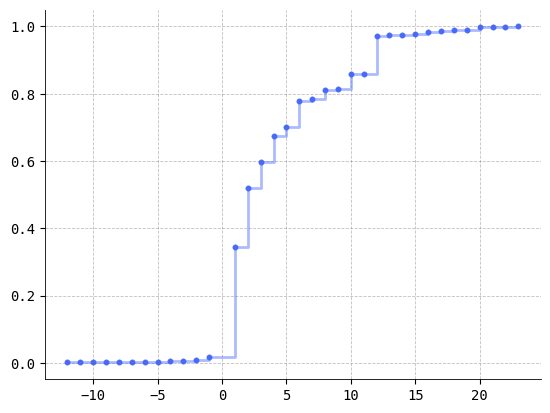

In [4]:
x, y = ecdf(data)

# plot the ecdf of the data
plt.plot(x, y, ds='steps-post', alpha=0.45, color='#486AFB')
plt.scatter(x, y)
plt.show()

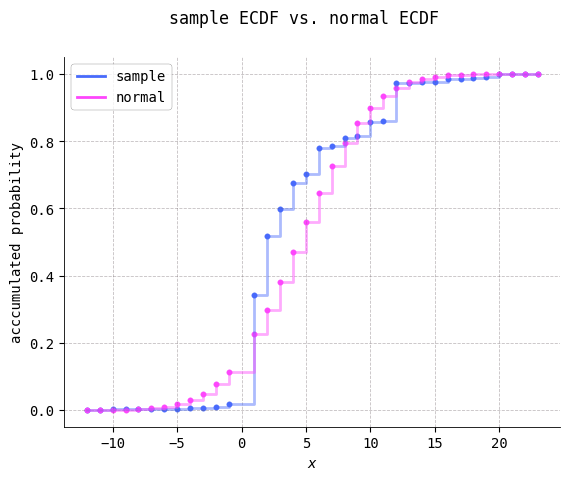

In [5]:
# compare our ecdf to a normal cdf with parameters given by the sample mean and sd
xbar = data.mean()
s = data.std()
X = norm(loc=xbar, scale=s)
y_norm = X.cdf(x)

plt.scatter(x, y)
plt.scatter(x, y_norm)
plt.plot(x, y, ds='steps-post', alpha=0.45, label='sample')
plt.plot(x, y_norm, ds='steps-post', alpha=0.45, label='normal')

plt.xlabel(r'$x$')
plt.ylabel('acccumulated probability')
plt.suptitle('sample ECDF vs. normal ECDF')

# the following code resets alpha=1 for the legend
leg = plt.legend()
for lh in leg.legend_handles:
    lh.set_alpha(1)

plt.show()